In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
df=pd.read_csv('/content/gdrive/My Drive/Dataset/data2.csv')

In [10]:
df.head()

,class_name,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [11]:
df.columns

Index(['class_name', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [12]:
df = df.drop(['beats'], axis=1)

## **Preprocesing**

In [13]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [14]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [15]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [16]:
df['class_label'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [17]:
df['class_name'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae',
                          'rock']

In [18]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [19]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')
#df[cols]
print(len(cols))

27


In [20]:
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,class_label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues,0
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues,0
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues,0
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues,0
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   class_name          1000 non-null   category
 1   tempo               1000 non-null   float64 
 2   chroma_stft         1000 non-null   float64 
 3   rmse                1000 non-null   float64 
 4   spectral_centroid   1000 non-null   float64 
 5   spectral_bandwidth  1000 non-null   float64 
 6   rolloff             1000 non-null   float64 
 7   zero_crossing_rate  1000 non-null   float64 
 8   mfcc1               1000 non-null   float64 
 9   mfcc2               1000 non-null   float64 
 10  mfcc3               1000 non-null   float64 
 11  mfcc4               1000 non-null   float64 
 12  mfcc5               1000 non-null   float64 
 13  mfcc6               1000 non-null   float64 
 14  mfcc7               1000 non-null   float64 
 15  mfcc8               1000 non-null   flo

In [22]:
df.isnull().sum()

class_name            0
tempo                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
class_label           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


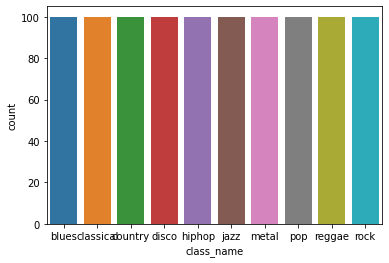

In [23]:
import seaborn as sns
sns.countplot(df['class_name'])

## Data Splitting for Training and Testing

In [24]:
%matplotlib notebook
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = df.iloc[:,1:28]
y = df['class_label']

# Min-Max Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x= scaler.fit_transform(X)
#Splitting
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)


## **Feature importance using Random Forest**

In [26]:
pip install matplotlib

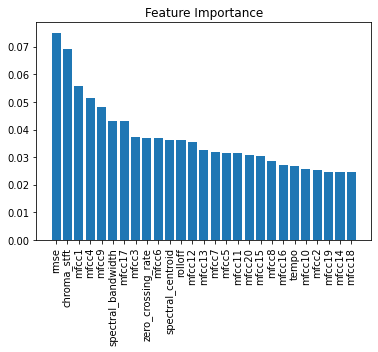

In [27]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
clf = RandomForestClassifier(random_state=10, n_jobs=-1).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [28]:
indices

array([ 2,  1,  7, 10, 15,  4, 23,  9,  6, 12,  3,  5, 18, 19, 13, 11, 17,
       26, 21, 14, 22,  0, 16,  8, 25, 20, 24])

## Feature importance using Decision Tree

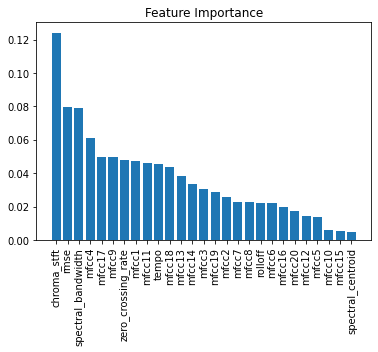

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [30]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=15)
#principalComponents = pca.fit_transform(X)
#pDf = pd.DataFrame(data = principalComponents
 #            , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

In [31]:
#X=pDf
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

## **KNN ALGORITHM**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Hyperparameter Tuning

In [33]:
nei=[]
for i in range (0,21):
  nei.append(i)

In [34]:
from sklearn.model_selection import GridSearchCV
grid_params={'n_neighbors':nei, 
             'weights':['uniform','distance'],
             'metric':['euclidean','manhattan']}


In [35]:
gs_knn=GridSearchCV(knn,
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [36]:
gs_knn_final=gs_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    4.7s finished


In [37]:
gs_knn_final.best_params_

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}

Final KNN

In [38]:
knn_ = KNeighborsClassifier(n_neighbors=6,
                           metric='euclidean',
                           weights='distance')
knnf=knn_.fit(X_train_scaled, y_train)
knn_accuracy=knnf.score(X_test_scaled, y_test)

In [39]:
y_pred = knnf.predict(X_test_scaled)

In [40]:
print("Accuracy (KNN) = ",knn_accuracy*100,"%")

Accuracy (KNN) =  65.15151515151516 %


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[23,  1,  3,  1,  0,  2,  4,  0,  0,  0],
       [ 0, 40,  1,  0,  1,  1,  0,  0,  0,  0],
       [ 1,  0, 19,  2,  2,  4,  0,  1,  1,  2],
       [ 0,  0,  1, 19,  3,  0,  0,  1,  2,  4],
       [ 3,  0,  2,  4, 17,  0,  2,  2,  3,  1],
       [ 0,  2,  3,  1,  0, 18,  0,  1,  1,  2],
       [ 3,  0,  0,  4,  2,  0, 25,  0,  0,  2],
       [ 0,  0,  1,  4,  0,  2,  0, 27,  0,  0],
       [ 0,  1,  3,  4,  4,  1,  0,  3, 15,  1],
       [ 2,  0,  2,  6,  1,  1,  0,  1,  2, 12]])

# Support Vector Machine

In [42]:
from sklearn.svm import SVC

Hyperparameter Tuning

In [43]:
svm=SVC()
c=range(1,10)
grid_params={'kernel':['linear','poly', 'rbf', 'sigmoid'],
             'C':c,
             'degree':[1,2,3,4,5],
             'gamma':['scale','auto']}

In [44]:
gs_svm=GridSearchCV(svm,
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [45]:
gs_svm_final=gs_svm.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   43.7s finished


In [46]:
gs_svm_final.best_params_

{'C': 6, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

**Final SVM**

In [47]:
clf_ = SVC(kernel = 'rbf', C=6,degree=1,gamma='scale')
clff=clf_.fit(X_train_scaled, y_train)
svm_accuracy=clff.score(X_test_scaled, y_test)

In [48]:
y_pred = clff.predict(X_test_scaled)

In [49]:
print("Accuracy(SVM) = ",svm_accuracy*100,"%")

Accuracy(SVM) =  73.33333333333333 %


In [50]:
confusion_matrix(y_test, y_pred)

array([[26,  0,  2,  0,  0,  1,  2,  0,  1,  2],
       [ 0, 40,  1,  0,  1,  1,  0,  0,  0,  0],
       [ 2,  0, 23,  1,  0,  1,  0,  0,  2,  3],
       [ 0,  0,  0, 21,  4,  0,  1,  0,  1,  3],
       [ 2,  0,  0,  2, 23,  0,  1,  1,  4,  1],
       [ 2,  0,  1,  1,  0, 24,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  1,  1, 29,  0,  0,  3],
       [ 0,  0,  0,  1,  2,  3,  0, 27,  1,  0],
       [ 0,  0,  3,  1,  6,  1,  0,  2, 18,  1],
       [ 4,  0,  4,  4,  0,  1,  1,  0,  2, 11]])

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
c=[]
a=1
for i in range(10,51):
  c.append(i/10)

In [53]:
lr = LogisticRegression()
grid_params={'C' : c,
             'solver':['lbfgs', 'liblinear', 'sag', 'saga']}

In [54]:
gs_lr=GridSearchCV(lr,
                grid_params,
                verbose=1,
                cv=5,
                n_jobs=-1)

In [55]:
gs_lr_final=gs_lr.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 164 candidates, totalling 820 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 820 out of 820 | elapsed:   53.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [56]:
gs_lr_final.best_params_

{'C': 4.7, 'solver': 'sag'}

Final Logistic Regression

In [57]:
lr_ = LogisticRegression(C= 4.7, solver='sag')
lrf=lr_.fit(X_train_scaled, y_train)
lr_accuracy=lrf.score(X_test_scaled, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [58]:
y_pred = lrf.predict(X_test_scaled)

In [59]:
print("Accuracy(LR) = ",lr_accuracy*100,"%")

Accuracy(LR) =  64.84848484848484 %


In [60]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  1,  0,  0,  2,  3,  0,  5,  8],
       [ 0, 39,  2,  0,  0,  1,  0,  0,  0,  1],
       [ 5,  0, 16,  0,  0,  4,  0,  1,  1,  5],
       [ 0,  0,  0, 18,  3,  0,  1,  3,  2,  3],
       [ 0,  0,  0,  1, 19,  0,  1,  3,  9,  1],
       [ 1,  0,  6,  0,  0, 20,  0,  0,  1,  0],
       [ 2,  0,  0,  4,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0, 31,  1,  0],
       [ 1,  0,  3,  2,  5,  1,  0,  1, 18,  1],
       [ 6,  0,  2,  2,  1,  3,  1,  1,  3,  8]])

In [61]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [62]:
estimators = []
estimators.append(('KNN', knn))
estimators.append(('SVM', clf))
estimators.append(('LR', lr))

In [63]:
#seed = 2
#kfold = model_selection.KFold(n_splits=2, random_state=seed)

## **Testing**

In [64]:
import librosa

In [65]:
def testfile(filename):


    y, sr = librosa.load(filename)
    #fetching tempo

    onset_env = librosa.onset.onset_strength(y, sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

    #fetching beats

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

    #chroma_stft

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    #rmse

    rmse = librosa.feature.rms(y=y)

    #fetching spectral centroid

    spec_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

    #spectral bandwidth

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    #fetching spectral rolloff

    spec_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]

    #zero crossing rate

    zero_crossing = librosa.feature.zero_crossing_rate(y)

    #mfcc

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    #metadata dictionary

    metadata_dict = {'tempo':tempo,'chroma_stft':np.mean(chroma_stft),'rmse':np.mean(rmse),
                     'spectral_centroid':np.mean(spec_centroid),'spectral_bandwidth':np.mean(spec_bw), 
                     'rolloff':np.mean(spec_rolloff), 'zero_crossing_rates':np.mean(zero_crossing)}

    for i in range(1,21):
        metadata_dict.update({'mfcc'+str(i):np.mean(mfcc[i-1])})

    return list(metadata_dict.values())





In [66]:
file="/content/gdrive/My Drive/Dataset/test1.wav"
a = testfile(file)

In [67]:
a

[135.99917763157896,
 0.39582816,
 0.11203362,
 2292.3824232586726,
 2149.2989810829604,
 4809.581641531323,
 0.12360086463167054,
 -79.0543,
 106.82529,
 -38.75037,
 39.862026,
 -26.758398,
 32.47765,
 -15.028122,
 29.708822,
 -11.373499,
 13.774842,
 -14.504783,
 16.16676,
 -3.0738242,
 3.5686011,
 -17.277794,
 -2.1238062,
 -12.570454,
 -1.23836,
 -1.2059714,
 9.0358]

Voting Ensemble Prediction

In [68]:
def vote_pred(data1):
  
  #Predicting Using KNN
  genre_prediction = knnf.predict(data1)
  pred_knn=genre_prediction[0]
  
  #Predicting Using SVM
  genre_prediction = clff.predict(data1)
  pred_svm=genre_prediction[0]
  
  #Predicting Using Logistic Regression
  genre_prediction = lrf.predict(data1)
  pred_lr=genre_prediction[0]
  
  vote=[0,0,0,0,0,0,0,0,0,0]
  vote[pred_knn]=vote[pred_knn]+knn_accuracy
  vote[pred_svm]=vote[pred_svm]+svm_accuracy
  vote[pred_lr]=vote[pred_lr]+lr_accuracy
  max=0
  for i in range (0,10):
    if vote[i]>max:
      max=i
  return max  

In [69]:
d1 =np.array(a)
data1 = scaler.transform([d1])

In [70]:
data1

array([[0.4502924 , 0.45557185, 0.2718313 , 0.44571039, 0.47913622,
        0.51221691, 0.40256302, 0.79618051, 0.55672795, 0.34899187,
        0.58948968, 0.17260049, 0.82750108, 0.32692489, 0.73893472,
        0.39934335, 0.65768754, 0.29792167, 0.82311235, 0.60272188,
        0.52558988, 0.00895159, 0.46531789, 0.16217531, 0.39251894,
        0.52117036, 0.82061138]])

In [71]:
m=X_test_scaled[0].tolist()

In [77]:
data1

array([[0.4502924 , 0.45557185, 0.2718313 , 0.44571039, 0.47913622,
        0.51221691, 0.40256302, 0.79618051, 0.55672795, 0.34899187,
        0.58948968, 0.17260049, 0.82750108, 0.32692489, 0.73893472,
        0.39934335, 0.65768754, 0.29792167, 0.82311235, 0.60272188,
        0.52558988, 0.00895159, 0.46531789, 0.16217531, 0.39251894,
        0.52117036, 0.82061138]])

In [78]:
print(lookup_genre_name[vote_pred(data1)])

metal
